[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/royforestano/Deep_Learning_Symmetries/blob/main/Deep_Learning_Symmetries_and_Their_Lie_Groups_Algebras_Subalgebras_from_First_Principles/sym_demo.ipynb)

# Deep Learning Symmetries and Their Lie Groups, Algebras, and Subalgebras from First Principles - Demonstration

Author: Roy Forestano

Date of Completion: 13 January 2023

Connected to the paper on: Deep Learning Symmetries and Their Lie Groups, Algebras, and Subalgebras from First Principles (arXiv:2301.05638: https://arxiv.org/abs/2301.05638)

This notebook will reproduce examples in the paper.

In [ ]:
# !pip install torch

In [ ]:
from sym_utils import *
%matplotlib inline

Using cpu device


In [ ]:
def oracle_norm(data):
    return torch.norm(data,dim=1)

#if n_dim==4:
def oracle_lorentz(data):
     return (data[:,0].reshape(data.shape[0],1))**2 \
             - (data[:,1].reshape(data.shape[0],1))**2 \
             - (data[:,2].reshape(data.shape[0],1))**2 \
             - (data[:,3].reshape(data.shape[0],1))**2   #- torch.sum( (data[:,1:].reshape(data.shape[0],3))**2,dim=1)

#if n_dim==2:
def oracle_squeeze(data):
    return (data[:,0]*data[:,1]).reshape(data.shape[0],1)

def oracle_piecewise_linear(data):
    a = data[:,0]
    b = -data[:,1]
    return torch.where(a >= 0, a, b)

def oracle_manhattan(data):
    return torch.abs(data[:,0])+torch.abs(data[:,1])

---

# How to run all relevant functions from sym_utils.py

## Choose Dimensions, Generators, Oracle, and Model Hyperparameters

In [ ]:
n       = 300
n_dim   = 3
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

## Run the Model and View the Training Loss

Epoch 5000   |  Train Loss: 1.0286118149893693e-06
Total Time: 33.44850516
Complete.


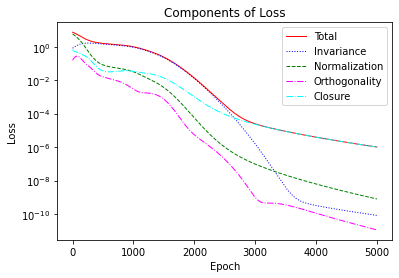

In [ ]:
# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

## Visualize Results

Create a Symmetry Vector Plot (for $n_{dim} = 2$)

In [ ]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)
#plt.savefig(path+'sym_vec_norm.pdf')

View the Resulting Generator(s)

In [ ]:
#path = 'plots/'

Generator 1: 
 tensor([[-3.9140e-04, -4.4344e-01,  7.6866e-01],
        [ 4.4309e-01, -2.0788e-04,  4.6117e-01],
        [-7.6887e-01, -4.6083e-01, -3.9835e-04]], requires_grad=True) 

Generator 2: 
 tensor([[-3.3961e-04, -5.2427e-01, -6.3964e-01],
        [ 5.2462e-01, -2.9813e-04,  5.6198e-01],
        [ 6.3934e-01, -5.6230e-01, -3.6104e-04]], requires_grad=True) 

Generator 3: 
 tensor([[-2.6478e-04, -7.2696e-01, -7.1632e-03],
        [ 7.2695e-01, -4.9677e-04, -6.8664e-01],
        [ 7.6516e-03,  6.8663e-01, -2.3819e-04]], requires_grad=True) 



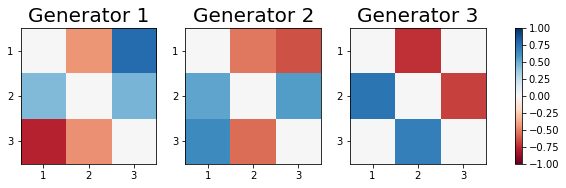

In [ ]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)
#plt.savefig(path+'so3ng3.pdf')

Visualize Rotation Axis Results for  $n_{dim} = 3$, $n_{gen} = 3$

Axis 1: [-0.460997 0.768762 0.443267]
Axis 2: [0.562144 0.639494 -0.524444]
Axis 3: [0.686640 -0.007407 0.726960]


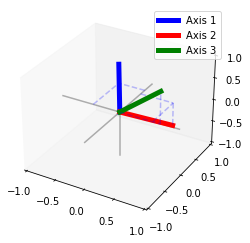

In [ ]:
if n_gen==3 and n_dim==3:
    visualize_generator_axes(gens_pred)
#plt.savefig(path+'so3ng3_axes.pdf')

View the Resulting Structure Constants (for $n_{gen}>1$)

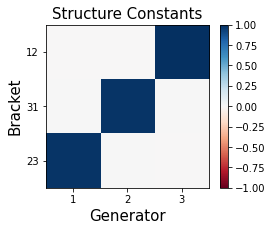

In [ ]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)
#plt.savefig('so3_sc.png',bbox_inches='tight')

## Verify Results

Verify the Structure Constants Produce an Algebra (for $n_{gen}>1$)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000073 -0.000008 1.000093]
 
 C = 
  [[-0.000436 0.000078 -0.000233]
 [0.000026 0.000496 0.000143]
 [-0.000335 -0.000053 0.000940]] 

The structure constants were found with a mean absolute error (MAE) of 0.000304416209479401. 
 

31: 
 Structure Constants = [0.002750 0.983181 0.000000]
 
 C = 
  [[0.000213 -0.008051 -0.012984]
 [0.007151 -0.000188 0.008171]
 [0.012748 -0.008201 0.000960]] 

The structure constants were found with a mean absolute error (MAE) of 0.0065185870757251095. 
 

23: 
 Structure Constants = [0.979646 0.000151 -0.000134]
 
 C = 
  [[0.000327 -0.008679 0.015581]
 [0.009395 -0.000281 0.009373]
 [-0.015887 -0.009031 0.000931]] 

The structure constants were found with a mean absolute error (MAE) of 0.007720492825243068. 
 

Total MAE = 0.014543496110447578


Verify Orthogonality (for $n_{gen}>1$)

In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.5707936775 rad, 89.9998482079 deg
Angle between generator 1 and 3: 1.5707919712 rad, 89.9997504430 deg
Angle between generator 2 and 3: 1.5707923671 rad, 89.9997731272 deg


---

# Orthogonal Groups: Figures 1-3: $n_{dim} = 2$, $n_{gen}=1,2$

##  $n_{dim} = 2$, $n_{gen}=1$

Epoch 4801   |  Train Loss: 1.9213054219480261e-25
Reached Near Machine Zero
Total Time: 7.62416792
Complete.


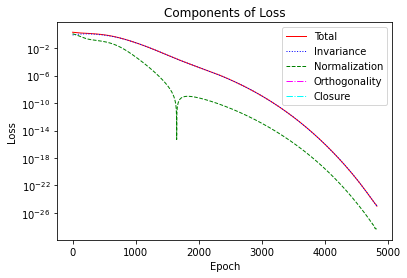

In [ ]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

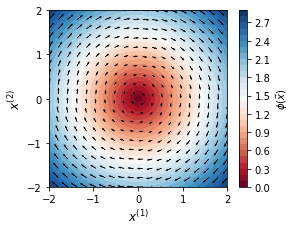

In [ ]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)

Generator: 
 tensor([[-5.0000e-04,  1.0000e+00],
        [-1.0000e+00, -5.0000e-04]], requires_grad=True) 



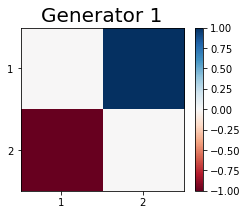

In [ ]:
figsizeg = (4,3)
rows = 1
cols = 1

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

##  $n_{dim} = 2$, $n_{gen}=2$ (Failed Case)

Epoch 1000   |  Train Loss: 1.7238972241717772
Total Time: 2.85841680
Complete.


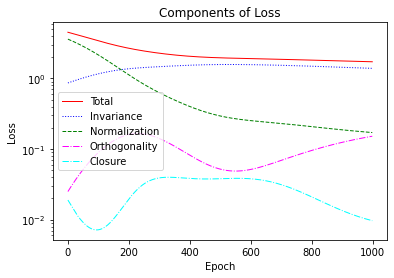

In [ ]:
n       = 300
n_dim   = 2
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 0.7601,  0.5564],
        [-0.4339,  0.7253]], requires_grad=True) 

Generator 2: 
 tensor([[-0.1017,  0.8797],
        [-0.8880, -0.5614]], requires_grad=True) 



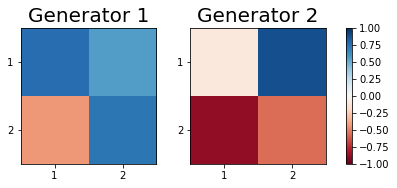

In [ ]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

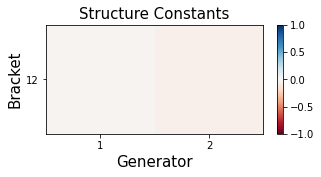

In [ ]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.025933 -0.047897]
 
 C = 
  [[-0.097537 -0.168592]
 [-0.222349 0.104294]] 

The structure constants were found with a mean absolute error (MAE) of 0.14819279958623055. 
 

Total MAE = 0.14819279958623055


In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.8553125120 rad, 106.3015766180 deg


# Orthogonal Groups: Figures 4-6: $n_{dim} = 3$, $n_{gen}=1,2,3,4$

##  $n_{dim} = 3$, $n_{gen}=1$

Epoch 4501   |  Train Loss: 1.9893380401946797e-25
Reached Near Machine Zero
Total Time: 5.55195189
Complete.


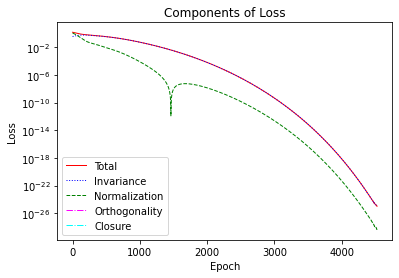

In [ ]:
n       = 300
n_dim   = 3
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = True )

Generator: 
 tensor([[-2.4406e-04, -3.6809e-01,  5.9383e-01],
        [ 3.6766e-01, -3.2361e-04,  7.1557e-01],
        [-5.9409e-01, -7.1535e-01, -4.3233e-04]], requires_grad=True) 



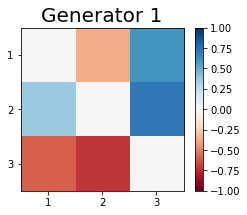

In [ ]:
figsizeg = (4,3)
rows = 1
cols = 1

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

##  $n_{dim} = 3$, $n_{gen}=2$ (Failed Case)

Epoch 5000   |  Train Loss: 0.44131866258466734
Total Time: 13.25528216
Complete.


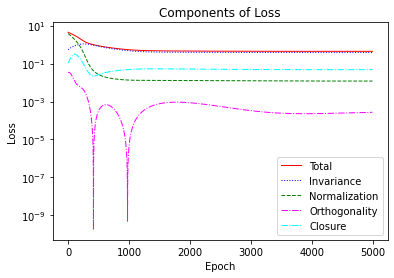

In [ ]:
n       = 300
n_dim   = 3
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 0.0713,  0.4743,  0.8376],
        [ 0.3679,  0.2676,  0.7372],
        [-0.3071, -0.1828, -0.3085]], requires_grad=True) 

Generator 2: 
 tensor([[-0.2889,  0.3070, -0.6980],
        [-0.3247,  0.3739,  0.6896],
        [ 0.5427, -0.5073, -0.0914]], requires_grad=True) 



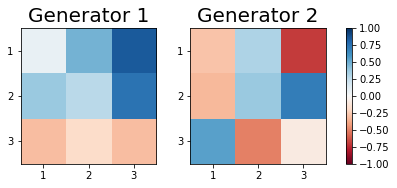

In [ ]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

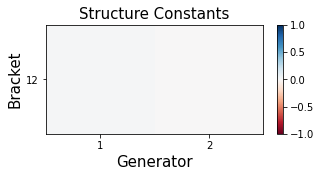

In [ ]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.009949 -0.000544]
 
 C = 
  [[-0.027601 -0.302933 -0.007633]
 [0.300418 0.016620 0.062463]
 [0.103891 -0.142970 0.010676]] 

The structure constants were found with a mean absolute error (MAE) of 0.1083562987533869. 
 

Total MAE = 0.1083562987533869


In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.1981559930 rad, 68.6492815993 deg


##  $n_{dim} = 3$, $n_{gen}=3$

Epoch 5000   |  Train Loss: 1.0286118149893693e-06
Total Time: 31.35889578
Complete.


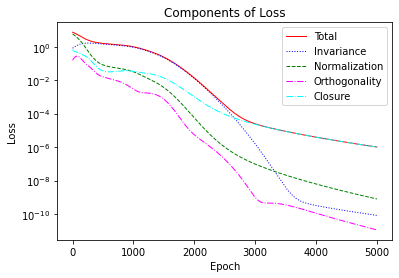

In [ ]:
n       = 300
n_dim   = 3
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[-3.9140e-04, -4.4344e-01,  7.6866e-01],
        [ 4.4309e-01, -2.0788e-04,  4.6117e-01],
        [-7.6887e-01, -4.6083e-01, -3.9835e-04]], requires_grad=True) 

Generator 2: 
 tensor([[-3.3961e-04, -5.2427e-01, -6.3964e-01],
        [ 5.2462e-01, -2.9813e-04,  5.6198e-01],
        [ 6.3934e-01, -5.6230e-01, -3.6104e-04]], requires_grad=True) 

Generator 3: 
 tensor([[-2.6478e-04, -7.2696e-01, -7.1632e-03],
        [ 7.2695e-01, -4.9677e-04, -6.8664e-01],
        [ 7.6516e-03,  6.8663e-01, -2.3819e-04]], requires_grad=True) 



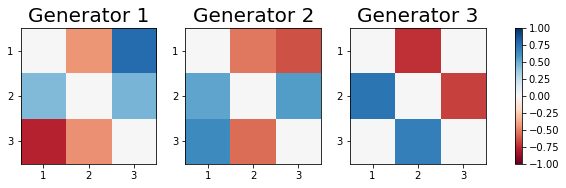

In [ ]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

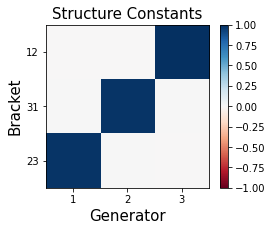

In [ ]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000073 -0.000008 1.000093]
 
 C = 
  [[-0.000436 0.000078 -0.000233]
 [0.000026 0.000496 0.000143]
 [-0.000335 -0.000053 0.000940]] 

The structure constants were found with a mean absolute error (MAE) of 0.000304416209479401. 
 

31: 
 Structure Constants = [0.002750 0.983181 0.000000]
 
 C = 
  [[0.000213 -0.008051 -0.012984]
 [0.007151 -0.000188 0.008171]
 [0.012748 -0.008201 0.000960]] 

The structure constants were found with a mean absolute error (MAE) of 0.0065185870757251095. 
 

23: 
 Structure Constants = [0.979646 0.000151 -0.000134]
 
 C = 
  [[0.000327 -0.008679 0.015581]
 [0.009395 -0.000281 0.009373]
 [-0.015887 -0.009031 0.000931]] 

The structure constants were found with a mean absolute error (MAE) of 0.007720492825243068. 
 

Total MAE = 0.014543496110447578


In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.5707936775 rad, 89.9998482079 deg
Angle between generator 1 and 3: 1.5707919712 rad, 89.9997504430 deg
Angle between generator 2 and 3: 1.5707923671 rad, 89.9997731272 deg


##  $n_{dim} = 3$, $n_{gen}=4$ (Failed Case)

Epoch 5000   |  Train Loss: 1.3146760068457333
Total Time: 40.45336819
Complete.


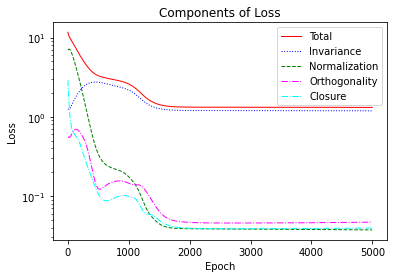

In [ ]:
n       = 300
n_dim   = 3
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[-0.1765, -0.6527,  0.2079],
        [ 0.6699,  0.2411,  0.9311],
        [-0.2372,  0.0296,  0.0191]], requires_grad=True) 

Generator 2: 
 tensor([[ 0.1673, -0.4093, -1.1150],
        [-0.0349,  0.2036,  0.0477],
        [ 0.0770, -0.3943, -0.4877]], requires_grad=True) 

Generator 3: 
 tensor([[ 0.2908, -0.5299,  0.4870],
        [ 0.5803, -0.0501, -0.7651],
        [-0.4086, -0.2356, -0.3913]], requires_grad=True) 

Generator 4: 
 tensor([[-0.2411, -0.5837, -0.4843],
        [ 0.2519, -0.3615, -0.4848],
        [ 0.0286,  0.5576,  0.7267]], requires_grad=True) 



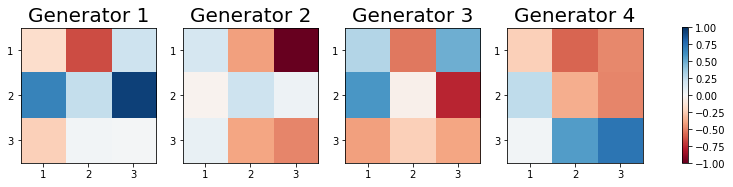

In [ ]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

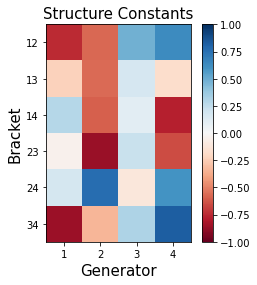

In [ ]:
if n_gen>1:
    figsizec=(4,4)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.742442 -0.571286 0.479928 0.629453]
 
 C = 
  [[0.025266 0.001483 0.020374]
 [0.084464 -0.118644 0.018214]
 [0.168794 -0.185969 0.083028]] 

The structure constants were found with a mean absolute error (MAE) of 0.07847057892692158. 
 

13: 
 Structure Constants = [-0.231849 -0.564627 0.168574 -0.172909]
 
 C = 
  [[-0.030422 -0.013684 0.008495]
 [-0.009988 -0.056168 0.006027]
 [-0.004431 -0.158319 0.086888]] 

The structure constants were found with a mean absolute error (MAE) of 0.04160242516009094. 
 

14: 
 Structure Constants = [0.286267 -0.597410 0.107298 -0.775487]
 
 C = 
  [[0.049931 -0.000925 0.002380]
 [0.017961 0.084562 -0.003067]
 [0.049002 0.214864 -0.115884]] 

The structure constants were found with a mean absolute error (MAE) of 0.05984176811447563. 
 

23: 
 Structure Constants = [-0.040909 -0.862326 0.224426 -0.651695]
 
 C = 
  [[0.076777 -0.027654 0.040020]
 [0.079805 -0.095899 0.019880]
 [0.250129 -0.102304 0.036467]] 

The structur

In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.9063502335 rad, 109.2258226552 deg
Angle between generator 1 and 3: 0.7079732721 rad, 40.5638804992 deg
Angle between generator 1 and 4: 1.5223238264 rad, 87.2227303050 deg
Angle between generator 2 and 3: 1.2142347978 rad, 69.5705292495 deg
Angle between generator 2 and 4: 1.3148334925 rad, 75.3344098819 deg
Angle between generator 3 and 4: 1.4889419679 rad, 85.3100907020 deg


# Orthogonal Groups: Figures 7-12: $n_{dim} = 4$, $n_{gen}=2,3,4,6$

##  $n_{dim} = 4$, $n_{gen} =2$

Epoch 5000   |  Train Loss: 2.346080944879921e-066
Total Time: 13.98792005
Complete.


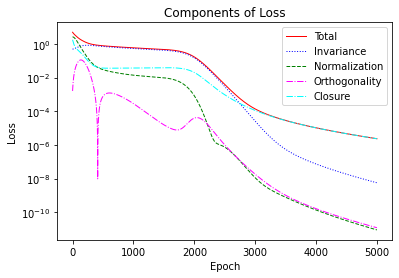

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[-3.0164e-04,  1.0685e-01,  5.0128e-01,  5.9682e-01],
        [-1.0668e-01, -1.8294e-04,  4.1206e-01, -4.2785e-01],
        [-5.0140e-01, -4.1201e-01, -2.3465e-04,  1.6832e-01],
        [-5.9666e-01,  4.2778e-01, -1.6848e-01, -2.8629e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-1.9343e-04, -2.8305e-01,  2.0620e-01,  5.1296e-01],
        [ 2.8300e-01, -3.1775e-04, -6.6129e-01,  3.4455e-01],
        [-2.0614e-01,  6.6131e-01, -2.7118e-04,  2.4130e-01],
        [-5.1301e-01, -3.4457e-01, -2.4117e-01, -2.1913e-04]],
       requires_grad=True) 



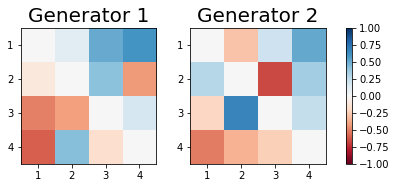

In [ ]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

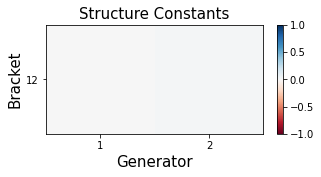

In [ ]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.006417 0.017099]
 
 C = 
  [[-0.000011 -0.004450 -0.018330 -0.010661]
 [0.004422 0.000039 0.006020 -0.016039]
 [0.018268 -0.005949 -0.000028 0.001625]
 [0.010687 0.016063 -0.001544 0.000023]] 

The structure constants were found with a mean absolute error (MAE) of 0.007134866711876679. 
 

Total MAE = 0.007134866711876679


In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.5432482162 rad, 88.4216095285 deg


##  $n_{dim} = 4$, $n_{gen} =3$

Epoch 5000   |  Train Loss: 7.238131984760691e-065
Total Time: 27.44016576
Complete.


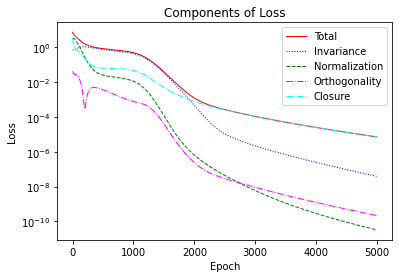

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                  include_sc = include_sc)

Generator 1: 
 tensor([[-1.1116e-04,  1.0858e-01,  2.0760e-01,  4.3761e-01],
        [-1.0808e-01, -2.9216e-04, -2.9660e-01, -7.0778e-01],
        [-2.0746e-01,  2.9624e-01, -1.6837e-04, -4.0606e-01],
        [-4.3766e-01,  7.0790e-01,  4.0576e-01, -4.2662e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-9.9149e-05, -2.4444e-01,  3.8809e-01, -1.0672e-01],
        [ 2.4471e-01, -3.2393e-04, -5.9763e-01,  4.9876e-01],
        [-3.8798e-01,  5.9795e-01, -3.5653e-04, -4.1486e-01],
        [ 1.0679e-01, -4.9852e-01,  4.1512e-01, -2.3303e-04]],
       requires_grad=True) 

Generator 3: 
 tensor([[-2.1121e-05,  1.1173e-01, -9.6436e-02,  6.2525e-02],
        [-1.1152e-01, -1.9904e-04,  5.8991e-01,  2.1672e-01],
        [ 9.6541e-02, -5.8980e-01, -4.5238e-04, -7.6118e-01],
        [-6.2657e-02, -2.1717e-01,  7.6107e-01, -3.1130e-04]],
       requires_grad=True) 



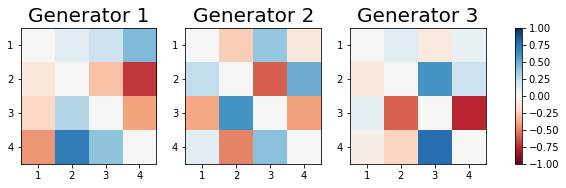

In [ ]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

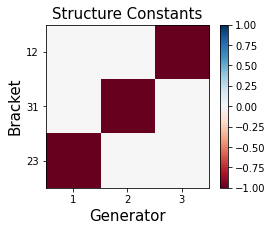

In [ ]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.000273 -0.001082 -1.001261]
 
 C = 
  [[0.000123 -0.021938 -0.008651 0.014882]
 [0.022360 -0.000890 0.001235 0.002553]
 [0.008459 -0.000950 -0.000338 0.000263]
 [-0.014548 -0.003133 -0.000734 0.000120]] 

The structure constants were found with a mean absolute error (MAE) of 0.006323567794030941. 
 

31: 
 Structure Constants = [0.000011 -1.001127 0.000006]
 
 C = 
  [[-0.000047 -0.011548 -0.016256 -0.012171]
 [0.012044 -0.000825 -0.005269 -0.008138]
 [0.016161 0.005263 0.000038 -0.006599]
 [0.012377 0.007684 0.007432 -0.000180]] 

The structure constants were found with a mean absolute error (MAE) of 0.007627036315555244. 
 

23: 
 Structure Constants = [-1.001187 0.000000 -0.000010]
 
 C = 
  [[-0.000132 -0.008110 0.023050 -0.005942]
 [0.008643 -0.000742 0.012525 -0.005659]
 [-0.022968 -0.012358 0.000281 0.003289]
 [0.005954 0.005355 -0.003562 -0.000407]] 

The structure constants were found with a mean absolute error (MAE) of 0.007436079347939784. 
 



In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.1785985845 rad, 10.2329451189 deg
Angle between generator 1 and 3: 0.5005403893 rad, 28.6788517824 deg
Angle between generator 2 and 3: 0.5210533793 rad, 29.8541595353 deg


##  $n_{dim} = 4$, $n_{gen} =4$

Epoch 6000   |  Train Loss: 7.091097669694277e-076
Total Time: 65.48239374
Complete.


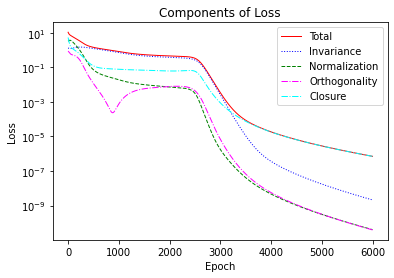

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[-2.7531e-04,  8.3351e-02, -2.3145e-02,  7.3898e-01],
        [-8.3261e-02, -2.2637e-04, -6.5261e-01, -1.3947e-01],
        [ 2.3072e-02,  6.5260e-01, -2.1401e-04,  3.3422e-02],
        [-7.3896e-01,  1.3939e-01, -3.3498e-02, -2.8395e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-1.3293e-04,  3.8164e-01,  3.3279e-01, -2.6491e-02],
        [-3.8158e-01, -2.4932e-04, -1.4800e-01,  5.7591e-01],
        [-3.3284e-01,  1.4816e-01, -2.5312e-04, -6.2395e-01],
        [ 2.6457e-02, -5.7580e-01,  6.2404e-01, -3.5916e-04]],
       requires_grad=True) 

Generator 3: 
 tensor([[-2.4057e-04,  5.6840e-01, -3.9847e-01, -3.5376e-02],
        [-5.6838e-01, -3.3073e-04,  1.4594e-01, -5.6524e-01],
        [ 3.9852e-01, -1.4591e-01, -1.8035e-04, -4.1965e-01],
        [ 3.5251e-02,  5.6518e-01,  4.1969e-01, -2.4896e-04]],
       requires_grad=True) 

Generator 4: 
 tensor([[-3.5450e-04,  4.7120e-01,  6.6239e-01,  2.1567e-01],
        [-4.7140e-01, -1.8874e-04,  3.4133e-

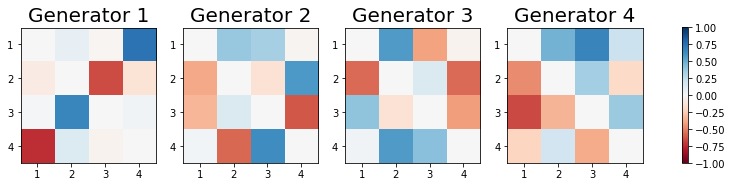

In [ ]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

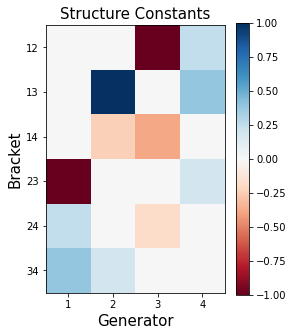

In [ ]:
if n_gen>1:
    figsizec=(4,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000000 -0.000002 -1.324741 0.248987]
 
 C = 
  [[-0.000259 -0.006786 0.004175 0.003821]
 [0.006895 -0.000439 0.004059 -0.004003]
 [-0.004053 -0.003970 -0.000115 -0.006709]
 [-0.004187 0.003923 0.006828 -0.000264]] 

The structure constants were found with a mean absolute error (MAE) of 0.0037804597547865405. 
 

13: 
 Structure Constants = [0.000052 1.324738 0.000052 0.384781]
 
 C = 
  [[0.000141 -0.000947 -0.003622 0.007260]
 [0.000831 0.000404 0.007199 0.003842]
 [0.003763 -0.007688 0.000480 -0.001049]
 [-0.007294 -0.004086 0.000827 0.000677]] 

The structure constants were found with a mean absolute error (MAE) of 0.003131904724180552. 
 

14: 
 Structure Constants = [0.000042 -0.235696 -0.383407 0.000004]
 
 C = 
  [[-0.000037 -0.002858 -0.006027 -0.000889]
 [0.002859 0.000011 0.000490 -0.004663]
 [0.005794 -0.000207 -0.000306 0.011936]
 [0.001212 0.004868 -0.011941 -0.000287]] 

The structure constants were found with a mean absolute error (MAE) of

In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 2.0562806496 rad, 117.8162027179 deg
Angle between generator 1 and 3: 0.7876734771 rad, 45.1303658732 deg
Angle between generator 1 and 4: 2.0932911547 rad, 119.9367484581 deg
Angle between generator 2 and 3: 1.5041625412 rad, 86.1821653102 deg
Angle between generator 2 and 4: 1.2808291072 rad, 73.3861021199 deg
Angle between generator 3 and 4: 1.4391941516 rad, 82.4597507860 deg


##  $n_{dim} = 4$, $n_{gen} =6$

Epoch 6000   |  Train Loss: 1.4227879162462561e-06
Total Time: 141.58129907
Complete.


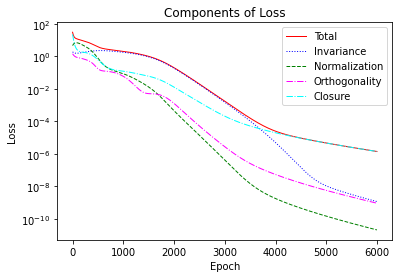

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 6    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc )

Generator 1: 
 tensor([[-4.5108e-04,  5.3075e-01, -6.1288e-02,  7.8899e-01],
        [-5.3094e-01, -1.7818e-04,  6.6800e-02,  2.5686e-01],
        [ 6.1440e-02, -6.6762e-02, -1.3645e-05, -1.4661e-01],
        [-7.8884e-01, -2.5729e-01,  1.4664e-01, -3.5411e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-1.4813e-04, -4.4265e-01, -2.5151e-01,  1.9076e-01],
        [ 4.4245e-01, -3.6588e-04, -4.1457e-01,  6.0677e-01],
        [ 2.5162e-01,  4.1420e-01, -2.0063e-04,  4.0571e-01],
        [-1.9113e-01, -6.0684e-01, -4.0541e-01, -2.8466e-04]],
       requires_grad=True) 

Generator 3: 
 tensor([[-1.4832e-04, -4.7373e-01,  2.5282e-01,  6.3722e-02],
        [ 4.7356e-01, -3.5090e-04,  5.4475e-01,  4.2929e-01],
        [-2.5303e-01, -5.4443e-01, -2.9283e-04, -4.7619e-01],
        [-6.4037e-02, -4.2951e-01,  4.7595e-01, -2.0890e-04]],
       requires_grad=True) 

Generator 4: 
 tensor([[-3.6073e-04,  2.0963e-01,  8.2050e-01, -6.6780e-02],
        [-2.0964e-01, -5.0501e-05,  4.4028e-

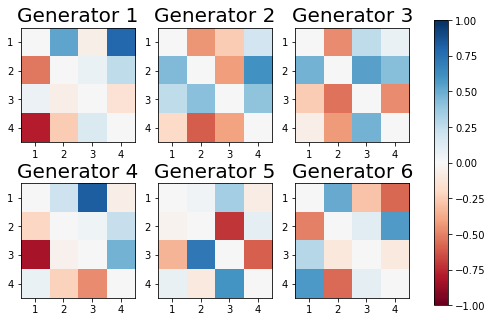

In [ ]:
figsizeg = (10,5.25)
rows = 2
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

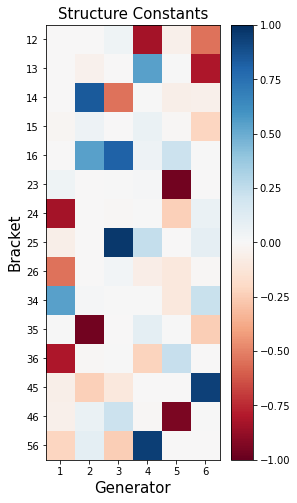

In [ ]:
if n_gen>1:
    figsizec=(4,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000000 -0.000001 0.044485 -0.835509 -0.052533 -0.544574]
 
 C = 
  [[-0.000959 0.000062 0.000236 0.000029]
 [0.000097 0.000226 0.000082 0.000356]
 [0.000168 0.000097 -0.000497 0.000194]
 [0.000030 0.000322 0.000258 -0.000158]] 

The structure constants were found with a mean absolute error (MAE) of 0.00023574908591702842. 
 

13: 
 Structure Constants = [-0.000343 -0.044476 -0.001657 0.542029 0.003433 -0.807026]
 
 C = 
  [[-0.000543 -0.000173 0.002287 -0.000116]
 [0.000077 0.000079 0.000413 0.001636]
 [-0.002507 -0.000564 0.000270 -0.000600]
 [-0.000452 -0.001004 0.000015 -0.000114]] 

The structure constants were found with a mean absolute error (MAE) of 0.0006781845893176084. 
 

14: 
 Structure Constants = [-0.000645 0.837533 -0.543342 0.002685 -0.061743 -0.052331]
 
 C = 
  [[0.000283 0.002416 -0.003141 -0.000797]
 [-0.002049 0.000128 0.000760 -0.000783]
 [0.001977 -0.000282 0.000102 -0.002089]
 [0.001400 0.000594 0.002096 -0.000332]] 

The structur

In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.3462281065 rad, 77.1331887659 deg
Angle between generator 1 and 3: 1.3949723652 rad, 79.9260290635 deg
Angle between generator 1 and 4: 1.8010812865 rad, 103.1943562744 deg
Angle between generator 1 and 5: 1.4869595238 rad, 85.1965050206 deg
Angle between generator 1 and 6: 0.3402850864 rad, 19.4968992826 deg
Angle between generator 2 and 3: 2.7201848749 rad, 155.8551128244 deg
Angle between generator 2 and 4: 1.9061073248 rad, 109.2119050096 deg
Angle between generator 2 and 5: 0.6386544013 rad, 36.5922017602 deg
Angle between generator 2 and 6: 1.3993669273 rad, 80.1778189219 deg
Angle between generator 3 and 4: 1.4253982018 rad, 81.6693010877 deg
Angle between generator 3 and 5: 2.5761762684 rad, 147.6040274635 deg
Angle between generator 3 and 6: 1.3512203116 rad, 77.4192210490 deg
Angle between generator 4 and 5: 1.3184969918 rad, 75.5443129301 deg
Angle between generator 4 and 6: 1.6648915440 rad, 95.3912588171 deg
Angle between generator 5 and 

---

# Lorentz Groups: Figures 14-22: $n_{dim} = 4$, $n_{gen}=2,3,4,6$

##  Non-Abelian: $n_{dim} = 4$, $n_{gen} =2$

Epoch 5000   |  Train Loss: 8.604307943076535e-065
Total Time: 12.98855710
Complete.


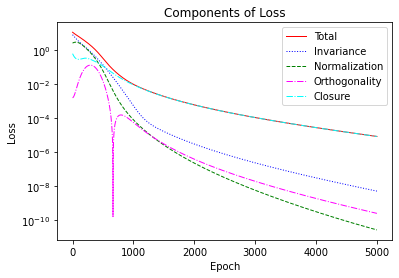

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(10)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 4.4331e-04,  6.4407e-01, -6.4449e-01,  2.3714e-01],
        [ 6.4415e-01,  1.8507e-04, -4.4918e-02,  2.1879e-01],
        [-6.4452e-01,  4.4561e-02,  1.7278e-04, -2.5254e-01],
        [ 2.3683e-01, -2.1861e-01,  2.5244e-01, -2.7844e-05]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 2.8894e-04, -5.6152e-01, -1.0269e-01,  5.0274e-01],
        [-5.6131e-01,  4.3417e-06, -4.5007e-01,  3.2507e-01],
        [-1.0311e-01,  4.5023e-01, -1.5291e-04, -3.3619e-01],
        [ 5.0289e-01, -3.2519e-01,  3.3628e-01,  1.7043e-05]],
       requires_grad=True) 



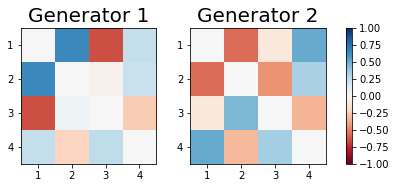

In [ ]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

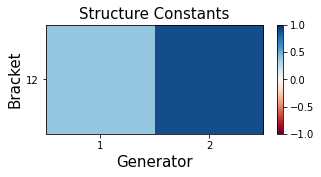

In [ ]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.387404 0.884093]
 
 C = 
  [[0.000211 -0.006210 -0.021540 -0.013211]
 [-0.005373 -0.000507 -0.021087 -0.013694]
 [-0.021817 0.021644 -0.000091 0.011351]
 [-0.013628 0.014056 -0.011646 -0.000052]] 

The structure constants were found with a mean absolute error (MAE) of 0.011007414318747851. 
 

Total MAE = 0.011007414318747851


In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.7587225816 rad, 43.4716017478 deg


## Abelian: $n_{dim} = 4$, $n_{gen} =2$

Epoch 5000   |  Train Loss: 7.443562145415887e-065
Total Time: 16.02842593
Complete.


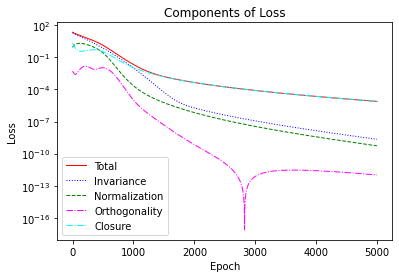

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(7)
torch.manual_seed(2)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 3.0074e-04,  1.2624e-02,  6.6666e-01, -3.9433e-01],
        [ 1.2404e-02, -1.9565e-04, -5.3072e-01, -3.3661e-01],
        [ 6.6670e-01,  5.3069e-01,  7.8235e-05, -7.0525e-02],
        [-3.9428e-01,  3.3663e-01,  7.0079e-02,  2.0176e-05]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 2.0471e-04, -3.8277e-02,  3.2286e-01, -5.4996e-01],
        [-3.8512e-02, -2.9508e-04,  3.9712e-01,  6.5878e-01],
        [ 3.2289e-01, -3.9713e-01, -2.6929e-05, -1.2909e-02],
        [-5.4992e-01, -6.5875e-01,  1.2469e-02, -6.6952e-05]],
       requires_grad=True) 



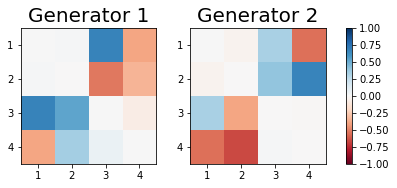

In [ ]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

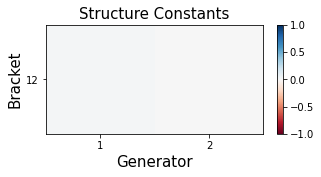

In [ ]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.019476 0.001219]
 
 C = 
  [[-0.000007 0.008582 0.004863 0.017899]
 [0.008557 0.000008 -0.011083 0.018384]
 [0.004886 0.011106 0.000008 -0.022010]
 [0.017918 -0.018386 0.021998 -0.000012]] 

The structure constants were found with a mean absolute error (MAE) of 0.010356667110508547. 
 

Total MAE = 0.010356667110508547


In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0341922944 rad, 1.9590741613 deg


## $n_{dim} = 4$, $n_{gen} =3$

Epoch 6000   |  Train Loss: 4.093750955737993e-065
Total Time: 39.26113319
Complete.


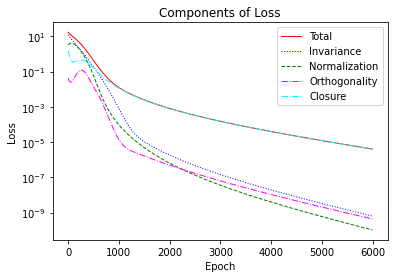

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(7)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 3.1408e-04,  5.2449e-01,  4.9594e-01,  3.2817e-01],
        [ 5.2428e-01, -1.7203e-05, -5.6788e-02, -5.5299e-01],
        [ 4.9589e-01,  5.6912e-02,  8.9645e-05, -2.4917e-01],
        [ 3.2858e-01,  5.5317e-01,  2.4930e-01, -1.2930e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 2.9333e-04, -6.2271e-01,  1.7515e-01,  4.1013e-01],
        [-6.2277e-01,  7.6639e-05, -4.8117e-01,  5.0211e-02],
        [ 1.7467e-01,  4.8108e-01, -1.9016e-04, -4.2344e-01],
        [ 4.1023e-01, -5.0265e-02,  4.2355e-01, -5.9251e-06]],
       requires_grad=True) 

Generator 3: 
 tensor([[ 3.2234e-04, -1.1461e-02, -6.1307e-01,  5.1923e-01],
        [-1.1844e-02, -1.3143e-04,  4.8461e-01, -1.6571e-01],
        [-6.1322e-01, -4.8465e-01,  2.4608e-05, -3.0363e-01],
        [ 5.1904e-01,  1.6556e-01,  3.0339e-01,  7.4682e-05]],
       requires_grad=True) 



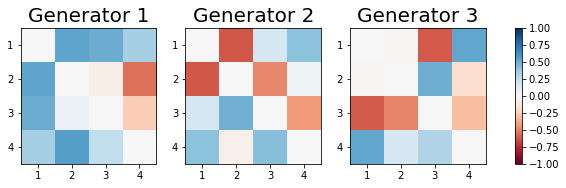

In [ ]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

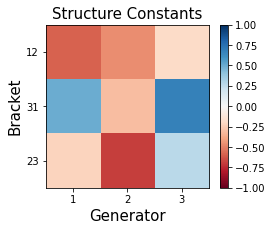

In [ ]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.587315 -0.466021 -0.191110]
 
 C = 
  [[-0.000142 0.000590 0.004552 -0.001197]
 [0.001089 0.000250 -0.010958 -0.009445]
 [0.004909 0.011417 0.000161 0.013109]
 [-0.001370 0.009211 -0.013281 0.000018]] 

The structure constants were found with a mean absolute error (MAE) of 0.0051063840333140055. 
 

31: 
 Structure Constants = [0.498153 -0.306192 0.675875]
 
 C = 
  [[0.000297 -0.005601 -0.002428 0.007610]
 [-0.006031 -0.000140 -0.004506 -0.011119]
 [-0.003229 0.003916 -0.000382 0.018477]
 [0.007948 0.011367 -0.018101 -0.000047]] 

The structure constants were found with a mean absolute error (MAE) of 0.006324781738719788. 
 

23: 
 Structure Constants = [-0.225166 -0.691171 0.269755]
 
 C = 
  [[-0.000023 -0.004876 -0.005015 0.008335]
 [-0.005019 -0.000111 -0.006731 -0.012310]
 [-0.004590 0.006888 0.000273 0.019974]
 [0.008432 0.012430 -0.020036 -0.000039]] 

The structure constants were found with a mean absolute error (MAE) of 0.007192592222877625. 
 

In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.0769277498 rad, 61.7034149057 deg
Angle between generator 1 and 3: 1.0865917330 rad, 62.2571203536 deg
Angle between generator 2 and 3: 0.0152488767 rad, 0.8736962784 deg


## $n_{dim} = 4$, $n_{gen} =4$

Epoch 6000   |  Train Loss: 1.5609981722965083e-05
Total Time: 66.27283025
Complete.


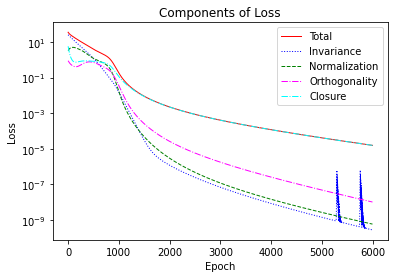

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 2.8311e-04,  5.0206e-01,  1.3801e-01,  5.4190e-01],
        [ 5.0170e-01, -8.8573e-05, -1.3181e-01, -6.4201e-01],
        [ 1.3811e-01,  1.3193e-01, -5.6764e-07,  7.4099e-02],
        [ 5.4221e-01,  6.4228e-01, -7.4103e-02, -6.2055e-05]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 4.5494e-04, -8.4595e-01,  1.1359e-01,  4.2680e-01],
        [-8.4607e-01,  3.1512e-04, -1.7602e-01, -2.3341e-01],
        [ 1.1347e-01,  1.7594e-01, -1.1105e-05,  6.2850e-02],
        [ 4.2660e-01,  2.3304e-01, -6.2843e-02,  6.1960e-05]],
       requires_grad=True) 

Generator 3: 
 tensor([[ 2.5623e-04, -7.9998e-02, -6.8457e-01,  1.9403e-01],
        [-8.0492e-02, -2.3792e-04,  6.7220e-01, -1.7652e-01],
        [-6.8450e-01, -6.7213e-01,  6.3670e-06,  6.5949e-02],
        [ 1.9406e-01,  1.7655e-01, -6.5963e-02,  9.4106e-07]],
       requires_grad=True) 

Generator 4: 
 tensor([[ 6.0460e-06,  2.7535e-02, -7.0335e-02, -7.9040e-02],
        [ 2.7536e-02, -1.0360e-05, -1.2160e-

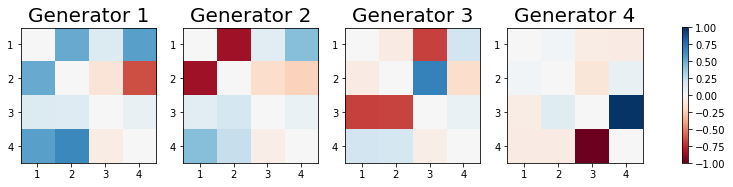

In [ ]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

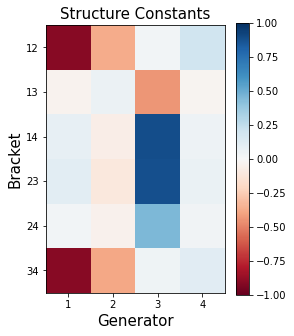

In [ ]:
if n_gen>1:
    figsizec=(4,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.910776 -0.374216 0.025156 0.199651]
 
 C = 
  [[-0.000218 -0.001716 -0.002876 0.004061]
 [-0.000738 0.000745 0.018305 -0.005672]
 [-0.002791 -0.018207 0.000092 -0.027368]
 [0.004371 0.005894 0.027383 0.000003]] 

The structure constants were found with a mean absolute error (MAE) of 0.007527510875803256. 
 

13: 
 Structure Constants = [-0.035214 0.058284 -0.439165 -0.023717]
 
 C = 
  [[-0.000141 0.000833 0.001278 -0.002686]
 [0.001068 0.000094 -0.005223 -0.002363]
 [0.001411 0.005344 -0.000008 -0.005839]
 [-0.002786 0.002271 0.005811 -0.000001]] 

The structure constants were found with a mean absolute error (MAE) of 0.002322289532682186. 
 

14: 
 Structure Constants = [0.082685 -0.064389 0.885513 0.053720]
 
 C = 
  [[-0.000153 0.007853 0.009580 0.012593]
 [0.008314 0.000310 0.009008 0.015279]
 [0.009466 -0.009138 0.000004 0.002302]
 [0.013258 -0.014625 -0.002257 -0.000090]] 

The structure constants were found with a mean absolute error (MAE) of 0.0

In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.7669382737 rad, 43.9423262283 deg
Angle between generator 1 and 3: 0.8130379598 rad, 46.5836436819 deg
Angle between generator 1 and 4: 1.2603549332 rad, 72.2130183601 deg
Angle between generator 2 and 3: 0.0510880355 rad, 2.9271288179 deg
Angle between generator 2 and 4: 1.5535380255 rad, 89.0111721737 deg
Angle between generator 3 and 4: 1.5548453614 rad, 89.0860770011 deg


## $n_{dim} = 4$, $n_{gen} =6$

Epoch 6000   |  Train Loss: 1.0370591198573376e-06
Total Time: 126.19483590
Complete.


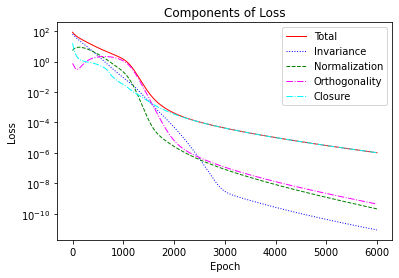

In [ ]:
n       = 300
n_dim   = 4
n_gen   = 6    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(2)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 3.4615e-04, -1.0756e-01,  8.2214e-01,  6.9462e-02],
        [-1.0784e-01, -1.2540e-04, -2.9992e-01, -4.1528e-01],
        [ 8.2209e-01,  2.9975e-01,  2.7027e-04, -2.1290e-01],
        [ 6.9592e-02,  4.1534e-01,  2.1283e-01, -1.0650e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 4.7329e-04, -2.1437e-02,  2.0867e-01, -9.5004e-01],
        [-2.1521e-02, -2.6332e-05,  1.8975e-01,  1.3095e-01],
        [ 2.0869e-01, -1.8976e-01,  3.9078e-06, -1.6324e-02],
        [-9.5003e-01, -1.3093e-01,  1.6101e-02,  4.4245e-04]],
       requires_grad=True) 

Generator 3: 
 tensor([[ 8.4417e-05, -3.7527e-01,  1.3395e-01,  1.0101e-01],
        [-3.7522e-01, -1.7918e-04,  6.1027e-01, -3.5598e-01],
        [ 1.3424e-01, -6.1012e-01, -3.4317e-04,  5.7619e-01],
        [ 1.0080e-01,  3.5629e-01, -5.7596e-01, -2.2422e-04]],
       requires_grad=True) 

Generator 4: 
 tensor([[ 3.4826e-04, -8.2677e-01,  7.4710e-02,  8.6131e-02],
        [-8.2673e-01,  1.9771e-04, -1.1556e-

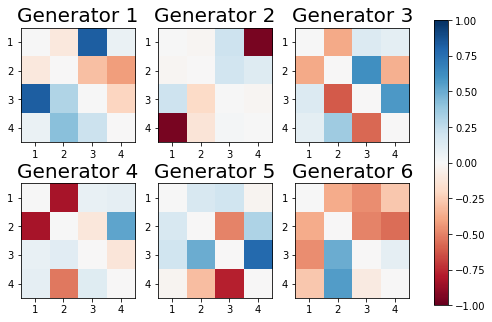

In [ ]:
figsizeg = (10,5.25)
rows = 2
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

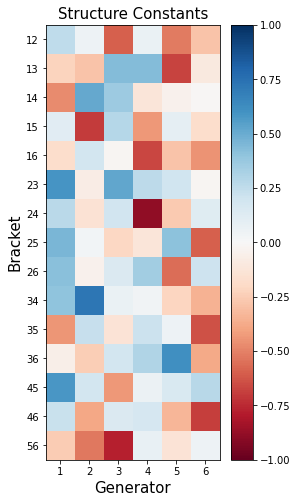

In [ ]:
if n_gen>1:
    figsizec=(4,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [ ]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.253660 0.051107 -0.594992 0.063024 -0.522701 -0.287483]
 
 C = 
  [[0.000149 0.001202 0.001458 -0.000427]
 [0.001162 -0.000211 -0.002651 0.000669]
 [0.002362 0.002691 -0.000501 0.001256]
 [0.000201 -0.000727 -0.001205 -0.000493]] 

The structure constants were found with a mean absolute error (MAE) of 0.0010852808243222974. 
 

13: 
 Structure Constants = [-0.219427 -0.286834 0.433544 0.432216 -0.678526 -0.097726]
 
 C = 
  [[0.000174 0.003695 -0.001163 -0.000158]
 [0.003746 -0.000109 0.000140 -0.001410]
 [-0.000670 -0.000994 -0.000373 0.000501]
 [-0.000464 0.000911 0.000180 0.000164]] 

The structure constants were found with a mean absolute error (MAE) of 0.0009282657566821042. 
 

14: 
 Structure Constants = [-0.471275 0.510690 0.360683 -0.122917 -0.045584 -0.014678]
 
 C = 
  [[-0.000357 -0.004090 -0.001544 0.000448]
 [-0.003674 0.000237 0.006130 -0.003077]
 [-0.001012 -0.006053 0.000312 -0.007873]
 [0.000357 0.003129 0.007380 -0.000221]] 

The struct

In [ ]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.9173097805 rad, 52.5579789301 deg
Angle between generator 1 and 3: 2.2469516422 rad, 128.7408458694 deg
Angle between generator 1 and 4: 0.8831706499 rad, 50.6019508305 deg
Angle between generator 1 and 5: 1.3556514669 rad, 77.6731075420 deg
Angle between generator 1 and 6: 1.1361006115 rad, 65.0937701390 deg
Angle between generator 2 and 3: 2.7603566191 rad, 158.1567842242 deg
Angle between generator 2 and 4: 1.3850560928 rad, 79.3578685056 deg
Angle between generator 2 and 5: 0.6803618103 rad, 38.9818602717 deg
Angle between generator 2 and 6: 0.7533338681 rad, 43.1628512079 deg
Angle between generator 3 and 4: 1.9953083349 rad, 114.3227464157 deg
Angle between generator 3 and 5: 2.2169043444 rad, 127.0192625161 deg
Angle between generator 3 and 6: 2.0604531329 rad, 118.0552684022 deg
Angle between generator 4 and 5: 1.5355122233 rad, 87.9783697876 deg
Angle between generator 4 and 6: 1.5482810366 rad, 88.7099688980 deg
Angle between generator 5 and

---

# Squeeze Map and Discontinuous Oracles: Figures 25-27: $n_{dim}=2$, $n_{gen}=1$

## $n_{dim} = 2$, $n_{gen} =1$

Epoch 2000   |  Train Loss: 1.708072839193266e-053
Total Time: 2.64235902
Complete.


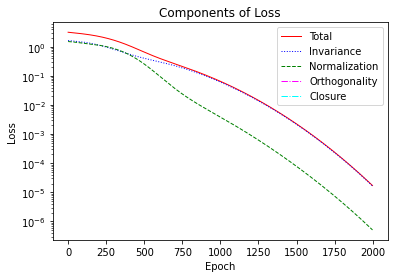

In [ ]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 2000
oracle = oracle_squeeze

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(2)
include_sc = False
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

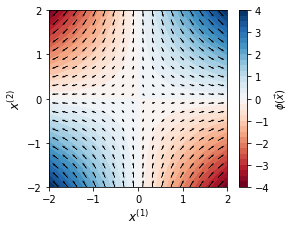

In [ ]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)

---

# SO(10): Figure 26: $n_{dim} =10, n_{gen} = 45$

Epoch 6000   |  Train Loss: 2.881432793836686e-089
Total Time: 789.96156311
Complete.


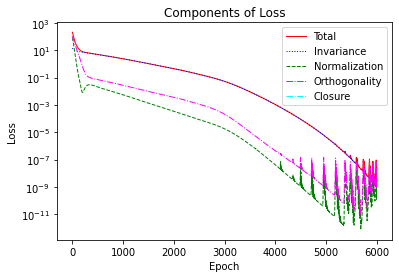

In [ ]:
n       = 300
n_dim   = 10
n_gen   = 45    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0) # 7
torch.manual_seed(0)
include_sc = False
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

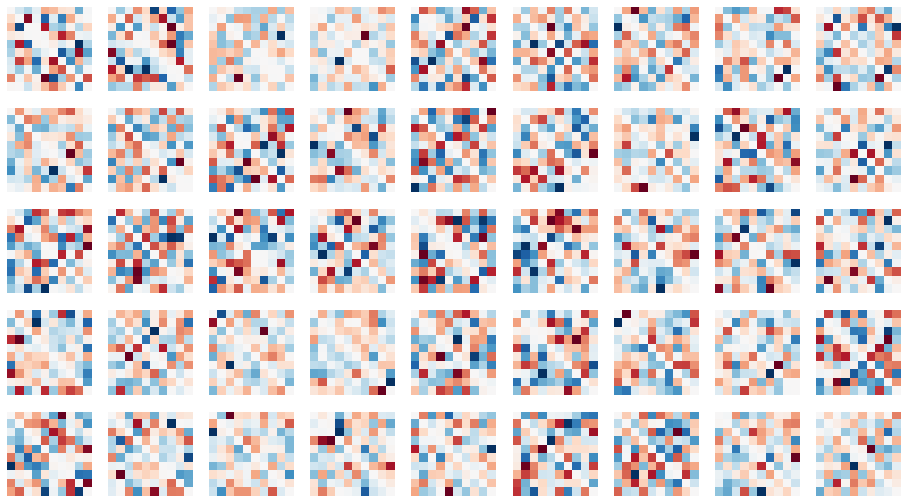

In [ ]:
figsizeg = (16,9)
rows = 5
cols = 9

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)